In [ ]:
# download the kaggle json file and save into root/.kaggle/ dir
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:16<00:00, 217MB/s]
100% 2.29G/2.29G [00:16<00:00, 151MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
import os
import shutil

def categorize_images(source_folders, bacteria_folder, virus_folder):
    # Create destination folders if they don't exist
    if not os.path.exists(bacteria_folder):
        os.makedirs(bacteria_folder)
    if not os.path.exists(virus_folder):
        os.makedirs(virus_folder)

    # Iterate through each source folder
    for source_folder in source_folders:
        # Iterate through files in the source folder
        for filename in os.listdir(source_folder):
            source_path = os.path.join(source_folder, filename)
            if os.path.isfile(source_path):
                if "bacteria" in filename:
                    # Move to bacteria folder
                    dest_path = os.path.join(bacteria_folder, filename)
                    shutil.copy(source_path, dest_path)
                elif "virus" in filename:
                    # Move to virus folder
                    dest_path = os.path.join(virus_folder, filename)
                    shutil.copy(source_path, dest_path)

# Example usage
source_folders = ["/content/chest_xray/chest_xray/train/PNEUMONIA", "/content/chest_xray/chest_xray/test/PNEUMONIA", "/content/chest_xray/chest_xray/val/PNEUMONIA"]
bacteria_folder = "Database/bacteria/"
virus_folder = "Database/virus/"

categorize_images(source_folders, bacteria_folder, virus_folder)


In [ ]:
import os
import shutil

def combine_folders(source_folders, destination_folder):
    # Create destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Iterate through each source folder
    for source_folder in source_folders:
        # Iterate through files in the source folder
        for filename in os.listdir(source_folder):
            source_path = os.path.join(source_folder, filename)
            if os.path.isfile(source_path):
                # Copy file to destination folder
                dest_path = os.path.join(destination_folder, filename)
                shutil.copy(source_path, dest_path)

# Example usage
source_folders = ["/content/chest_xray/chest_xray/train/NORMAL", "/content/chest_xray/chest_xray/test/NORMAL", "/content/chest_xray/chest_xray/val/NORMAL"]
destination_folder = "Database/normal"

combine_folders(source_folders, destination_folder)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
#import cv2
import os

In [ ]:
# Check filenames
image_names=list(os.listdir("Database"))
image_names.sort()
print(image_names)

['bacteria', 'normal', 'virus']


In [ ]:
normal_dir=os.path.join("Database/normal")
virus_dir=os.path.join("Database/virus")
bacteria_dir=os.path.join("Database/bacteria")


print('total normal images:', len(os.listdir(normal_dir)))
print('total virus images:', len(os.listdir(virus_dir)))
print('total bactria images:', len(os.listdir(bacteria_dir)))

total normal images: 1584
total virus images: 1493
total bactria images: 2780


In [ ]:
#  Check Classes
image_names=list(os.listdir("Database/"))
image_names.sort()
print(image_names)
class_number = len(image_names)

['bacteria', 'normal', 'virus']


In [ ]:
device = tf.test.gpu_device_name()
device

'/device:GPU:0'

In [ ]:

data_dir = "Database/"
batch_size = 128
img_height, img_width = 224,224
epochs = 41

datagen= ImageDataGenerator(rescale=1/255,validation_split=.3,rotation_range=20,
                           shear_range=.2,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2)

# Flow training images in batches of batch_size using train_data
train_generator= datagen.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                subset="training",
                class_mode="categorical",
                classes= image_names,
                shuffle=False,
                seed=30)


datagen2=ImageDataGenerator(rescale=1/255,validation_split=.3)

val_generator=datagen2.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                classes= image_names,
                class_mode="categorical",
                subset="validation",
                shuffle=False,
                seed=30)
## For evaluation
eval_train_generator= datagen.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                subset="training",
                class_mode="categorical",
                classes= image_names,
                shuffle=False,
                seed=30)

eval_val_generator=datagen2.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                classes= image_names,
                class_mode="categorical",
                subset="validation",
                shuffle=False,
                seed=30)


Found 4101 images belonging to 3 classes.
Found 1755 images belonging to 3 classes.
Found 4101 images belonging to 3 classes.
Found 1755 images belonging to 3 classes.


In [ ]:
VGG16_classifier=VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(img_height, img_width, 3)))

for layer in VGG16_classifier.layers:
    layer.trainable=False

with tf.device(device):
  VGG16_model = tf.keras.Sequential([
                                     VGG16_classifier,
                                     MaxPooling2D(),
                                     Dense(img_height, activation='relu'),
                                     Flatten(),
                                     Dense(class_number, activation='softmax')
                                     ])
  VGG16_model.compile(
      optimizer='adam',
      loss=tf.losses.CategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
      )

  VGG16_model_history = VGG16_model.fit(
      train_generator,
      validation_data=val_generator,
      epochs=epochs,
      verbose=1)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/41


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


33/33 [==============================] - 144s 4s/step - loss: 1.3618 - accuracy: 0.5208 - val_loss: 1.1887 - val_accuracy: 0.4689
Epoch 2/41
33/33 [==============================] - 103s 3s/step - loss: 1.1140 - accuracy: 0.4899 - val_loss: 0.9286 - val_accuracy: 0.5550
Epoch 3/41
33/33 [==============================] - 103s 3s/step - loss: 0.8629 - accuracy: 0.6398 - val_loss: 0.8346 - val_accuracy: 0.6308
Epoch 4/41
33/33 [==============================] - 101s 3s/step - loss: 0.7382 - accuracy: 0.6815 - val_loss: 0.7621 - val_accuracy: 0.6507
Epoch 5/41
33/33 [==============================] - 102s 3s/step - loss: 0.6888 - accuracy: 0.7069 - val_loss: 0.6440 - val_accuracy: 0.7128
Epoch 6/41
33/33 [==============================] - 104s 3s/step - loss: 0.6716 - accuracy: 0.7059 - val_loss: 0.6822 - val_accuracy: 0.6986
Epoch 7/41
33/33 [==============================] - 103s 3s/step - loss: 0.7554 - accuracy: 0.6362 - val_loss: 0.8518 - val_accuracy: 0.6211
Epoch 8/41
33/33 [======

In [ ]:
train_loss, train_acc = VGG16_model.evaluate(train_generator)
print("\n Train Accuracy:", train_acc)
print("\n Train Loss:", train_loss)

33/33 [==============================] - 80s 2s/step - loss: 0.4764 - accuracy: 0.8013

 Train Accuracy: 0.8012679815292358

 Train Loss: 0.4764418303966522


In [ ]:
test_loss, test_acc= VGG16_model.evaluate(val_generator)
print("\n Test Accuracy:", test_acc)
print("\n Test Loss:", test_loss)

14/14 [==============================] - 19s 1s/step - loss: 0.6371 - accuracy: 0.7481

 Test Accuracy: 0.7481481432914734

 Test Loss: 0.6370686888694763


In [ ]:

# Print Confusion Matrix for Analysis- Validation

Y_pred = VGG16_model.predict(val_generator, 1250 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('VGG16 Confusion Matrix- Validation')
conf_matrix = pd.DataFrame(
    confusion_matrix(val_generator.classes, y_pred),
    index=['true: bacteria', 'true: normal','true: virus'],
    columns=['pred: bacteria', 'pred: normal','pred: virus']
)
conf_matrix.to_csv("/content/confusion_matrix.jpeg")
print(conf_matrix)
print('\n')
print('Classification Report')
target_names = list(val_generator.class_indices.keys())
print(classification_report(val_generator.classes, y_pred, target_names=target_names))


14/14 [==============================] - 25s 2s/step
VGG16 Confusion Matrix- Validation
                pred: bacteria  pred: normal  pred: virus
true: bacteria             686            69           79
true: normal                 8           466            0
true: virus                196            90          161


Classification Report
              precision    recall  f1-score   support

    bacteria       0.77      0.82      0.80       834
      normal       0.75      0.98      0.85       474
       virus       0.67      0.36      0.47       447

    accuracy                           0.75      1755
   macro avg       0.73      0.72      0.70      1755
weighted avg       0.74      0.75      0.73      1755



In [ ]:

# Print Confusion Matrix for Analysis- TRAINING

Y_pred = VGG16_model.predict(train_generator, 2919 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('VGG16 Confusion Matrix for Training')
conf_matrix = pd.DataFrame(
    confusion_matrix(train_generator.classes, y_pred),
    index=['true: bacteria', 'true: normal','true: virus'],
    columns=['pred: bacteria', 'pred: normal','pred: virus']
)
conf_matrix.to_csv("/content/confusion_matrix_train.jpeg")
print(conf_matrix)
print('\n')
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

33/33 [==============================] - 85s 3s/step
VGG16 Confusion Matrix for Training
                pred: bacteria  pred: normal  pred: virus
true: bacteria            1801            52           93
true: normal                55          1007           47
true: virus                515            79          452


Classification Report
              precision    recall  f1-score   support

    bacteria       0.76      0.93      0.83      1946
      normal       0.88      0.91      0.90      1109
       virus       0.76      0.43      0.55      1046

    accuracy                           0.79      4101
   macro avg       0.80      0.76      0.76      4101
weighted avg       0.79      0.79      0.78      4101



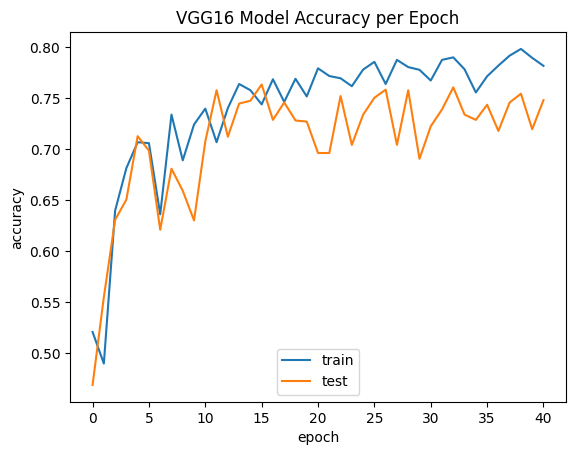

In [ ]:

# PLOT ACCURACY
plt.plot(VGG16_model_history.history['accuracy'])
plt.plot(VGG16_model_history.history['val_accuracy'])
plt.title('VGG16 Model Accuracy per Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower center')
plt.show()

In [ ]:
# Begin Predictions and save to CSV

#NORMAL

image_path = '/content/chest_xray/chest_xray/test/NORMAL/IM-0003-0001.jpeg'
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = VGG16_model.predict(input_arr)
np.around(predictions, decimals=3)

1/1 [==============================] - 1s 1s/step


array([[0., 1., 0.]], dtype=float32)

In [ ]:
# Begin Predictions and save to CSV

#BACTERIAL

image_path = '/content/chest_xray/chest_xray/test/PNEUMONIA/person101_bacteria_485.jpeg'
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = VGG16_model.predict(input_arr)
np.around(predictions, decimals=3)

1/1 [==============================] - 0s 32ms/step


array([[1., 0., 0.]], dtype=float32)

In [ ]:
# Begin Predictions and save to CSV

#VIRAL

image_path = '/content/chest_xray/chest_xray/test/PNEUMONIA/person1649_virus_2850.jpeg'
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = VGG16_model.predict(input_arr)
np.around(predictions, decimals=3)

1/1 [==============================] - 0s 30ms/step


array([[0., 0., 1.]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save Model
VGG16_model.save('/content/drive/MyDrive/TRAIN/VGG16_model')
VGG16_model.save('/content/drive/MyDrive/TRAIN/VGG16_model/VGG16_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
